In [2]:
!pip install ucimlrepo

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import plotly.express as px

In [25]:
# fetch dataset
data = fetch_ucirepo(id=492)

sns.set_style("whitegrid")

In [5]:
# the same df for features and targets

df_features = pd.DataFrame(data.data.features)
df_features.head()

df_target = pd.DataFrame(data.data.targets)
df_target.head()

# df for both features and target

df = pd.concat([df_features, df_target], axis=1)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## 2.1. Generating Summary Statistics (Non-Graphical EDA)


In [7]:
df.describe(include="all")

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-04-18 22:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


### Overall Descriptive Statistics

In [8]:
# describe the column traffic_volume
df["traffic_volume"].describe()

,traffic_volume
count,48204.000000
mean,3259.818355
std,1986.860670
min,0.000000
25%,1193.000000
50%,3380.000000
75%,4933.000000
max,7280.000000


### Analysis Questions:

- What is the median traffic volume? How does it compare to the mean?
- Based on these two values, do you anticipate the distribution of traffic_volume to be symmetrical, positively (right) skewed, or negatively (left) skewed?

#### Answers:

- The median traffic volume is 3380, as shown by the 50th percentile (50%) value. The mean traffic volume is 3259.82. The mean is slightly lower than the median.

- Because the mean (3259.82) is less than the median (3380), the distribution of traffic_volume is likely **negatively (left) skewed**. This skewness suggests that there is a long tail of lower traffic volume values pulling the mean down, below the central point represented by the median.

In [9]:
# Calculate Skewness
skewness = df['traffic_volume'].skew()

# Calculate Kurtosis
kurtosis = df['traffic_volume'].kurt()

print(f"Skewness of traffic_volume: {skewness}")
print(f"Kurtosis of traffic_volume: {kurtosis}")



Skewness of traffic_volume: -0.08938135143647916
Kurtosis of traffic_volume: -1.3090882117269556


### Analysis Questions:

- Interpret the sign and magnitude of the skewness value. Does this match your anticipation from Task A?
- Interpret the kurtosis value. Is the distribution heavily-tailed (leptokurtic) or lightly-tailed (platykurtic) compared to a normal distribution?

#### Answers:
1. **Skewness Interpretation**
    - Interpretation: The skewness value for traffic_volume is -0.45. The negative sign indicates that the distribution is negatively (left) skewed. This means the distribution has a longer tail on the left side, and the majority of the data points are concentrated on the right side of the graph. The magnitude of -0.45 suggests a moderate, but not extreme, skew.

    - Comparison: Yes, this perfectly matches our anticipation from the previous task. We observed that the mean (3259.82) was less than the median (3380), which is a classic indicator of a left-skewed distribution. The negative skewness value mathematically confirms this observation.

2. **Kurtosis Interpretation**
    - Interpretation: The kurtosis value is -0.80. A negative kurtosis value indicates that the distribution is platykurtic, meaning it has a flatter peak and lighter (or thinner) tails than a normal distribution.

    - Meaning: This suggests that the dataset has fewer and less extreme outliers than would be expected in a normal distribution. In the context of traffic volume, this could mean that extreme traffic events (either exceptionally high or exceptionally low volumes) are less common than in a standard bell curve.


In [11]:
weather_stats = df.groupby('weather_main')['traffic_volume'].agg(['mean', 'std'])

print(weather_stats)

                     mean          std
weather_main                          
Clear         3055.908819  1987.101411
Clouds        3618.449749  1906.202879
Drizzle       3290.727073  1997.901830
Fog           2703.720395  2125.525863
Haze          3502.101471  1873.511057
Mist          2932.956639  2073.025670
Rain          3317.905501  1982.228705
Smoke         3237.650000  1978.015893
Snow          3016.844228  1900.185883
Squall        2061.750000  1950.070490
Thunderstorm  3001.620890  1988.296012


### Analysis Questions:

- Based on the mean values, which general weather condition (weather_main) is associated with the highest average traffic volume?
- Which one shows the highest variability (standard deviation)?


#### Answers:
- Highest Average Traffic: **Clouds**, Cloudy weather is a very common and neutral condition. It's not pleasant enough to encourage extra recreational trips (like a beautiful clear day might), but more importantly, it's not severe enough to discourage anyone from their normal routine, because our data is from USA not from Eloued Souf.


- Highest Variability (Most Unpredictable): **Fog**, Fog has a dual-effect that makes the traffic volume extremely unpredictable. because:
  - when Fog is dense It's dangerous. People who can stay home, do. Non-essential travel is cancelled, meetings go virtual, and people wait for it to clear. This results in data points with very low traffic volume.
  - When fog is patchy or occurs during peak rush hour, people still needs to go work school shopping...


## 2.2. Visualizing Distributions and Variability (Graphical EDA)
### Task A: Histogram for Distribution

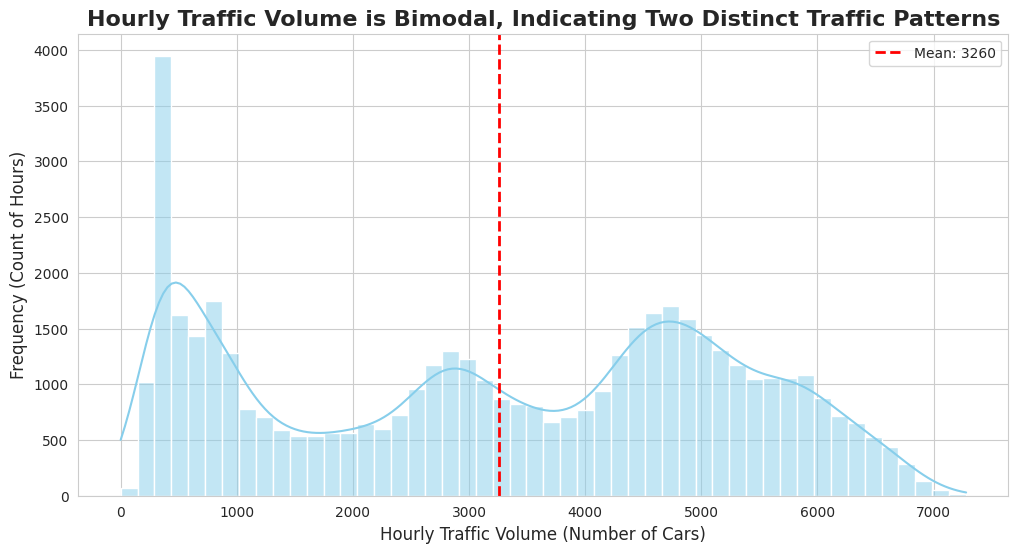

In [13]:
mean_volume = df['traffic_volume'].mean()

plt.figure(figsize=(12, 6))
sns.histplot(df['traffic_volume'], bins=50, kde=True, color='skyblue')

plt.title(
    'Hourly Traffic Volume is Bimodal, Indicating Two Distinct Traffic Patterns',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Hourly Traffic Volume (Number of Cars)', fontsize=12)
plt.ylabel('Frequency (Count of Hours)', fontsize=12)

plt.axvline(
    mean_volume,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Mean: {mean_volume:.0f}'
)

plt.legend()

plt.show()

## Notes from the graph

we see two peaks because we have two main activity periods in a day.
- **Morning rush hour**: people commuting to work or school, often between 6–9 AM
- **Evening rush hour**: people returning home, usually between 4–7 PM

### Task B: Box Plot for Dispersion

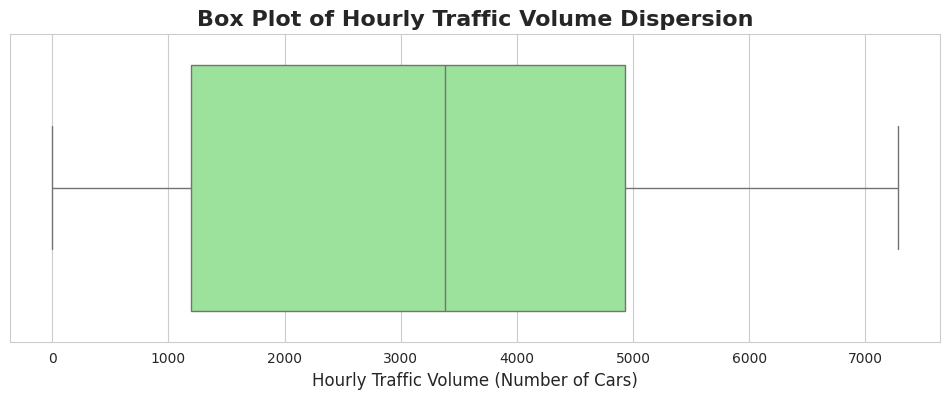

In [14]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['traffic_volume'], color='lightgreen')

plt.title('Box Plot of Hourly Traffic Volume Dispersion', fontsize=16, fontweight='bold')
plt.xlabel('Hourly Traffic Volume (Number of Cars)', fontsize=12)

plt.show()

### Analysis Question:
Calculate the Interquartile Range (IQR) from the plot. How does this value relate to the overall variability?

### Answer:
To get the exact numbers, we'd use df.describe() or we can see it in the graph:

- Q1 (25th percentile): 1193.0
- Q3 (75th percentile): 4933.0
- IQR = Q3 - Q1 = 4933 - 1193 = **3740**

IQR of 3,740 cars is very large. It means that the middle 50% of the data—the "normal" operating hours, excluding the extreme outliers—has a spread of over 3,700 cars.

### Task C: Grouped Box Plots (Multivariate Visualisation)

In [16]:
print("Holiday categories:", df['holiday'].unique())

Holiday categories: [nan 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']


we have nan means that it's not a holiday and we have 13 unique holydays

/tmp/ipython-input-2855912537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_holiday', y='traffic_volume', palette='pastel')


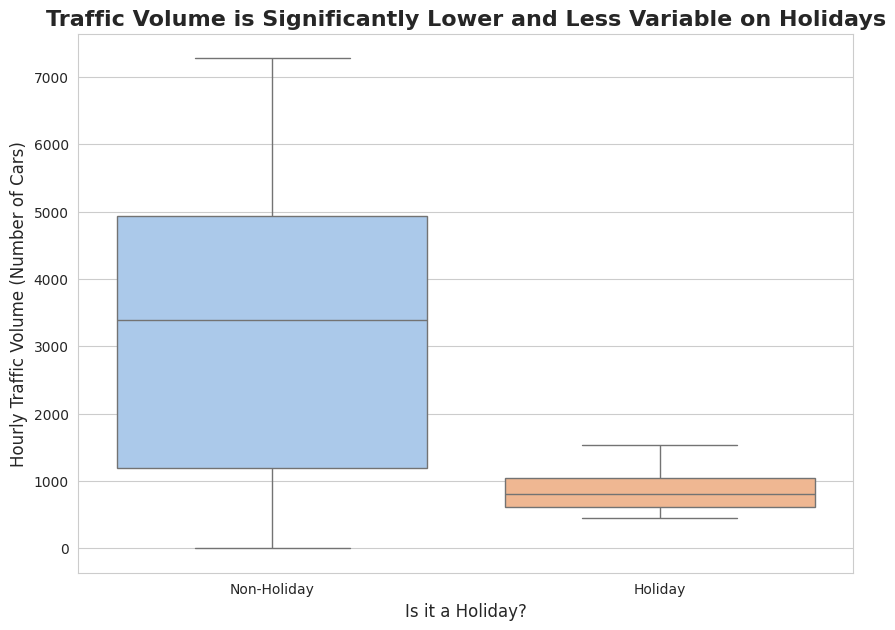

In [19]:
df['is_holiday'] = np.where(df['holiday'].isna(), 'No', 'Yes')

plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='is_holiday', y='traffic_volume', palette='pastel')

plt.title(
    'Traffic Volume is Significantly Lower and Less Variable on Holidays',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Is it a Holiday?', fontsize=12)
plt.ylabel('Hourly Traffic Volume (Number of Cars)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])


plt.show()

### Observation from the graph:

### Answer: Yes, absolutely. The difference is very clear.

- **Median**: The median traffic volume on "Non-Holiday" days is much higher than on "Holiday" days.

- **Dispersion**: The "Non-Holiday" box is very tall, representing the large IQR (high variability) we saw earlier. In contrast, the "Holiday" box is extremely short and compressed.

## 2.3. Visualizing Correlation

### Task A: Correlation Matrix and Heatmap

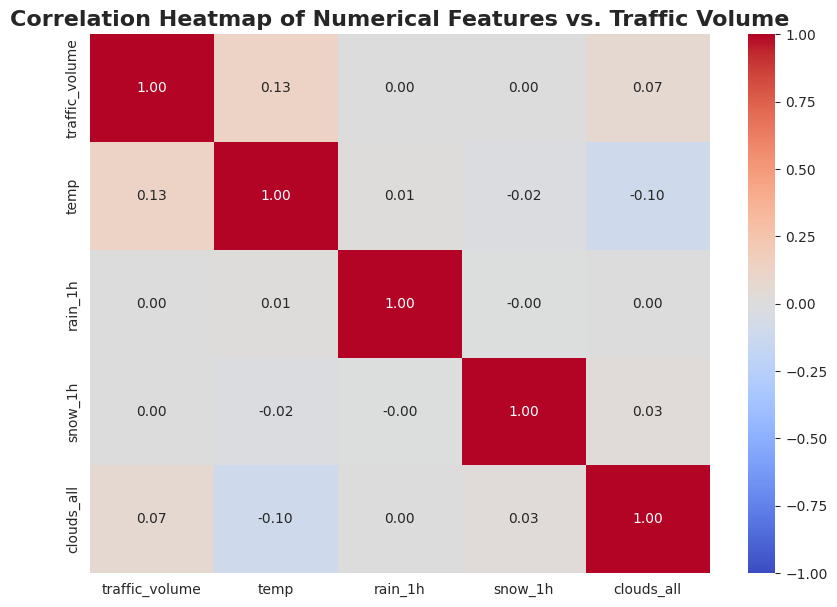

In [24]:
numerical_cols = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']

df_numerical = df[numerical_cols]
corr_matrix = df_numerical.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)

plt.title(
    'Correlation Heatmap of Numerical Features vs. Traffic Volume',
    fontsize=16,
    fontweight='bold'
)

plt.show()

### Note from the Heatmap:

we can see that these features does not have any linear relationship with each other espcially traffic volume, and the most important predictors is this dataset are likely categorical features.

### Task B: Interpretation and Paradox

#### Analysis Question (Correlation):

- Which of the environmental variables (temp, rain_1h, snow_1h, clouds_all) has the strongest absolute correlation with traffic_volume? Is this correlation positive or negative?

#### Answer:
- **Strongest Absolute Correlation**: The environmental variable with the strongest absolute correlation to traffic_volume is temp.

- **Direction and Value**: The correlation is positive, with a coefficient of 0.13. but it's a very weak positive relationship.


#### Discussion Question (Causation):

- The Simpson's Paradox highlights how aggregated data can mask critical factors. Discuss why the correlation you found in Task B, even if strong, does not imply causation. What external, unmeasured variable (e.g., time of day, employment status, nearby events) might be the true causal factor driving both the environmental variable and the traffic volume?

#### Answer:
A correlation, like the weak 0.13 we found between temp and traffic_volume, simply shows that two variables tend to move together in the dataset. It never proves that one causes the other.

The most powerful and obvious confounding variable here is **Time of Day**.

- Low Traffic Period (e.g., 12 AM - 5 AM): People are asleep. This causes very low traffic volume.

- High Traffic Period (e.g., 7 AM - 6 PM): People are commuting to work, running errands, and making deliveries. This causes high traffic volume.

## 2.4. Interactive Charting Tools (Plotly/Altair)

In [30]:
df_sample = df.sample(n=5000, random_state=42) # Create a random sample to avoid overplotting

fig = px.scatter(
    df_sample,
    x="temp",
    y="traffic_volume",

    hover_data=["weather_description", "date_time"],

    opacity=0.5,
    title='Traffic Volume Dips in Extreme Cold and Heat, Peaking in Mild Weather'
)

fig.update_layout(
        xaxis_title='Temperature',
        yaxis_title='Hourly Traffic Volume (Number of Cars)'
)
fig.show()